In [9]:
#==============================================
# Importación de Librerias
#==============================================
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, classification_report

In [2]:
#==============================================
# Carga dataset
#==============================================
print("Loading Data...")
# Cargamos el dataset de diabetes desde un archivo CSV
diabetes = pd.read_csv('/content/drive/MyDrive/Promo/diabetes.csv')

print("\nTop 10 registros del dataset:")
print(diabetes.head(10).to_string(index=False))

Loading Data...

Top 10 registros del dataset:
 PatientID  Pregnancies  PlasmaGlucose  DiastolicBloodPressure  TricepsThickness  SerumInsulin       BMI  DiabetesPedigree  Age  Diabetic
   1354778            0            171                      80                34            23 43.509726          1.213191   21         0
   1147438            8             92                      93                47            36 21.240576          0.158365   23         0
   1640031            7            115                      47                52            35 41.511523          0.079019   23         0
   1883350            9            103                      78                25           304 29.582192          1.282870   43         1
   1424119            1             85                      59                27            35 42.604536          0.549542   22         0
   1619297            0             82                      92                 9           253 19.724160          0.103424   

In [3]:
#==============================================
# Preparación de variables
#==============================================

# X son las variables predictoras (caracteristicas) y y es la etiqueta obetivo (si es diabetico o no)
X = diabetes[['Pregnancies','PlasmaGlucose','DiastolicBloodPressure','TricepsThickness','SerumInsulin','BMI','DiabetesPedigree','Age']].values
y = diabetes['Diabetic'].values


In [4]:
#==============================================
# Divisón en entranamiento y prueba
#==============================================

# Separamos los datos en 70% entrenamiento y 30% prueba
# Esto nos permitirá evaluar qué tan bien generaliza el modelo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0, stratify=y)

In [6]:
#==============================================
# Definición de hiperparametros a probar
#==============================================
# Probamos distintos valores de C (Inverso de regularización)
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'solver': ['liblinear'] # solver estable para datasets pequeños
}

In [8]:
#==============================================
# Busqueda con GridSearchCV
#==============================================
print("Buscando los mejores hiperparametros con GridSearchCV...")
grid = GridSearchCV(LogisticRegression(max_iter=200),
                    param_grid,
                    cv=5,
                    scoring='accuracy',
                    verbose=1)

grid.fit(X_train, y_train)

print("Mejores hiperparametros encontrados:")
print(grid.best_params_)

Buscando los mejores hiperparametros con GridSearchCV...
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Mejores hiperparametros encontrados:
{'C': 1, 'solver': 'liblinear'}


In [11]:
#==============================================
# Entrenamiento y evaluación de modelos
#==============================================
best_model = grid.best_estimator_

# Predicciones sobre entrenamiento y prueba
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

  # Probabilidades (necesarias para AUC)
y_test_prob = best_model.predict_proba(X_test)[:,1]

In [15]:
#==============================================
# Evaluación con métricas relevantes
#==============================================
print("----------- Metricas del modelo en TEST -----------")
print(f"Accuracy  : {accuracy_score(y_test, y_test_pred)}")
print(f"Precision : {precision_score(y_test, y_test_pred)}")
print(f"Recall    : {recall_score(y_test, y_test_pred)}")
print(f"F1-score  : {f1_score(y_test, y_test_pred)}")
print(f"ROC-AUC   : {roc_auc_score(y_test, y_test_prob)}")

print("Reporte de Clasificación:")
print(classification_report(y_test, y_test_pred))

----------- Metricas del modelo en TEST -----------
Accuracy  : 0.78
Precision : 0.7078787878787879
Recall    : 0.5822532402791625
F1-score  : 0.6389496717724289
ROC-AUC   : 0.8547542150713607
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.81      0.88      0.84      1997
           1       0.71      0.58      0.64      1003

    accuracy                           0.78      3000
   macro avg       0.76      0.73      0.74      3000
weighted avg       0.77      0.78      0.77      3000



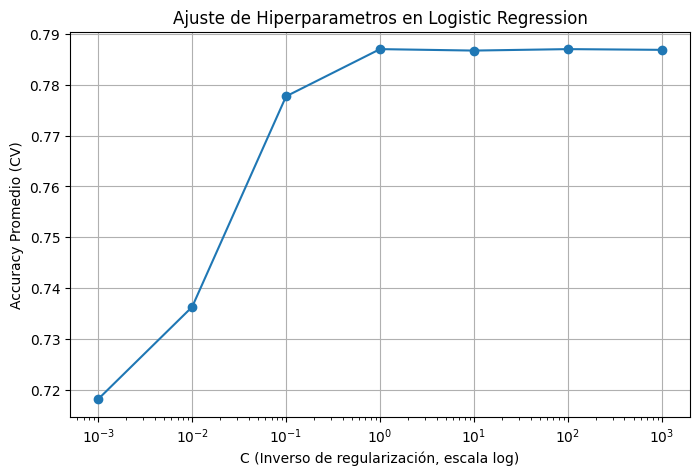

In [18]:
#==============================================
# Comparación de rendimiento en grid
#==============================================
results = pd.DataFrame(grid.cv_results_)

# Graficamos accuracy promedio por cada valor de C
plt.figure(figsize=(8,5))
plt.semilogx(param_grid['C'], results['mean_test_score'], marker='o')
plt.xlabel("C (Inverso de regularización, escala log)")
plt.ylabel("Accuracy Promedio (CV)")
plt.title("Ajuste de Hiperparametros en Logistic Regression")
plt.grid(True)
plt.show()